In [1]:
import numpy as np
import folium
from datetime import datetime

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: Qt5Agg


In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [5]:
df.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null object
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
dtypes: float64(9), int64(7), object

In [7]:
df.shape

(43431, 19)

In [8]:
# finding unique area_ids for both 'to' and 'from' i.e. pickup and drop area_ids 

no_of_from_areas = len(df['from_area_id'].unique())
no_of_to_areas = len(df['to_area_id'].unique())

In [9]:
no_of_from_areas

599

In [10]:
no_of_to_areas

569

In [11]:
areas = df['to_area_id'].tolist() + df['from_area_id'].tolist()           # merging 'to' and 'from' area_ids

In [12]:
len(areas)

86862

In [13]:
clean_areas =  [area for area in areas if str(area).strip() !='nan']      # removing nans for count of total area_ids

In [14]:
clean_areas

[448.0,
 540.0,
 1034.0,
 398.0,
 849.0,
 1323.0,
 832.0,
 376.0,
 776.0,
 1330.0,
 1328.0,
 590.0,
 58.0,
 292.0,
 393.0,
 585.0,
 212.0,
 1063.0,
 409.0,
 393.0,
 61.0,
 585.0,
 330.0,
 393.0,
 1068.0,
 1194.0,
 1010.0,
 839.0,
 496.0,
 393.0,
 571.0,
 1390.0,
 1384.0,
 1270.0,
 585.0,
 571.0,
 393.0,
 83.0,
 1021.0,
 793.0,
 1075.0,
 1010.0,
 363.0,
 1153.0,
 186.0,
 393.0,
 393.0,
 393.0,
 1189.0,
 392.0,
 871.0,
 1053.0,
 1068.0,
 393.0,
 393.0,
 585.0,
 186.0,
 949.0,
 793.0,
 1384.0,
 1183.0,
 393.0,
 1194.0,
 393.0,
 217.0,
 585.0,
 585.0,
 393.0,
 393.0,
 585.0,
 466.0,
 393.0,
 393.0,
 1223.0,
 142.0,
 1069.0,
 1384.0,
 409.0,
 763.0,
 393.0,
 1056.0,
 585.0,
 776.0,
 142.0,
 168.0,
 105.0,
 448.0,
 393.0,
 1084.0,
 1084.0,
 112.0,
 112.0,
 393.0,
 393.0,
 393.0,
 793.0,
 393.0,
 1384.0,
 58.0,
 1237.0,
 571.0,
 393.0,
 292.0,
 393.0,
 167.0,
 297.0,
 393.0,
 171.0,
 410.0,
 793.0,
 458.0,
 393.0,
 1312.0,
 297.0,
 136.0,
 1026.0,
 450.0,
 393.0,
 393.0,
 1038.0,
 478.0,
 116

In [15]:
# these area_ids will be useful while forecasting the demand area_wise

area_ids = set(clean_areas)

In [16]:
len(area_ids)

607

In [17]:
list(area_ids)

[2.0,
 6.0,
 15.0,
 16.0,
 17.0,
 22.0,
 24.0,
 25.0,
 34.0,
 49.0,
 50.0,
 51.0,
 52.0,
 58.0,
 61.0,
 62.0,
 67.0,
 68.0,
 72.0,
 79.0,
 83.0,
 85.0,
 87.0,
 89.0,
 91.0,
 92.0,
 95.0,
 97.0,
 104.0,
 105.0,
 112.0,
 115.0,
 117.0,
 118.0,
 119.0,
 120.0,
 122.0,
 128.0,
 130.0,
 133.0,
 136.0,
 137.0,
 138.0,
 141.0,
 142.0,
 143.0,
 145.0,
 147.0,
 149.0,
 150.0,
 151.0,
 156.0,
 157.0,
 160.0,
 167.0,
 168.0,
 171.0,
 172.0,
 173.0,
 174.0,
 176.0,
 177.0,
 178.0,
 181.0,
 182.0,
 184.0,
 185.0,
 186.0,
 187.0,
 190.0,
 192.0,
 195.0,
 197.0,
 200.0,
 201.0,
 203.0,
 206.0,
 207.0,
 209.0,
 211.0,
 212.0,
 213.0,
 214.0,
 215.0,
 216.0,
 217.0,
 218.0,
 219.0,
 220.0,
 221.0,
 222.0,
 227.0,
 235.0,
 238.0,
 243.0,
 253.0,
 262.0,
 264.0,
 269.0,
 271.0,
 273.0,
 278.0,
 292.0,
 293.0,
 296.0,
 297.0,
 300.0,
 301.0,
 308.0,
 321.0,
 326.0,
 328.0,
 330.0,
 334.0,
 339.0,
 344.0,
 352.0,
 353.0,
 355.0,
 356.0,
 357.0,
 358.0,
 362.0,
 363.0,
 367.0,
 369.0,
 373.0,
 376.0,
 384.0

In [18]:
area_ids

{2.0,
 6.0,
 15.0,
 16.0,
 17.0,
 22.0,
 24.0,
 25.0,
 34.0,
 49.0,
 50.0,
 51.0,
 52.0,
 58.0,
 61.0,
 62.0,
 67.0,
 68.0,
 72.0,
 79.0,
 83.0,
 85.0,
 87.0,
 89.0,
 91.0,
 92.0,
 95.0,
 97.0,
 104.0,
 105.0,
 112.0,
 115.0,
 117.0,
 118.0,
 119.0,
 120.0,
 122.0,
 128.0,
 130.0,
 133.0,
 136.0,
 137.0,
 138.0,
 141.0,
 142.0,
 143.0,
 145.0,
 147.0,
 149.0,
 150.0,
 151.0,
 156.0,
 157.0,
 160.0,
 167.0,
 168.0,
 171.0,
 172.0,
 173.0,
 174.0,
 176.0,
 177.0,
 178.0,
 181.0,
 182.0,
 184.0,
 185.0,
 186.0,
 187.0,
 190.0,
 192.0,
 195.0,
 197.0,
 200.0,
 201.0,
 203.0,
 206.0,
 207.0,
 209.0,
 211.0,
 212.0,
 213.0,
 214.0,
 215.0,
 216.0,
 217.0,
 218.0,
 219.0,
 220.0,
 221.0,
 222.0,
 227.0,
 235.0,
 238.0,
 243.0,
 253.0,
 262.0,
 264.0,
 269.0,
 271.0,
 273.0,
 278.0,
 292.0,
 293.0,
 296.0,
 297.0,
 300.0,
 301.0,
 308.0,
 321.0,
 326.0,
 328.0,
 330.0,
 334.0,
 339.0,
 344.0,
 352.0,
 353.0,
 355.0,
 356.0,
 357.0,
 358.0,
 362.0,
 363.0,
 367.0,
 369.0,
 373.0,
 376.0,
 384.0

Like we did with area_id, we could similarly also use  city_id for the analysis part

In [19]:
# visualizing the number of null values for each feature which can be used for cleaning and knowing amount of useable 
# data and useable features 

print("Number of nan values = {}".format(df.isnull().sum()))

Number of nan values = id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64


As we see above, some important features like "from_area_id", "to_area_id", "from_lat", "to_lat", "from_long", "to_long" has huge number of NaN values, so we will be cleaning and discarding the rows which have a NaN value for any of these features

"to_date" feature values can be fixed based on "from_date" and "trip_distance" which can be found from the "from_lat_long" and "to_lat_long" values.

In [20]:
# remove rows where lat long values are NaN

clean_df = df
clean_df['from_lat'] = df['from_lat'].dropna()

# drop values with string as 'nan'
clean_df = df[ df['from_lat'].astype(str) != 'nan']
clean_df = df[ df['to_lat'].astype(str) != 'nan']

clean_df.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             34293
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34293
from_date                  0
to_date                15186
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
dtype: int64

In [21]:
df.shape

(43431, 19)

In [22]:
#tried reindex but gaves nans on missing rows

clean_df = clean_df.reset_index()

In [23]:
clean_df.head(10)

,index,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0
5,5,132518,17712,12,NaN,2,1021.0,1323.0,NaN,NaN,1/1/2013 22:30,NaN,0,0,1/1/2013 8:01,13.028530,77.546250,12.869805,77.653211,0
6,7,132520,22181,12,NaN,2,1192.0,832.0,NaN,NaN,1/1/2013 11:00,NaN,0,0,1/1/2013 9:39,12.976770,77.572700,12.880190,77.645580,0
7,9,132522,22184,12,NaN,2,516.0,376.0,NaN,NaN,1/1/2013 11:00,NaN,0,0,1/1/2013 9:49,13.005600,77.657990,12.902450,77.660810,0
8,10,132523,4941,12,NaN,2,150.0,776.0,NaN,NaN,1/1/2013 11:00,NaN,0,0,1/1/2013 9:55,12.897240,77.610650,13.015080,77.677960,0
9,11,132524,17037,12,NaN,2,455.0,1330.0,NaN,NaN,1/1/2013 12:45,NaN,0,0,1/1/2013 9:59,12.999874,77.678120,12.953434,77.706510,0


The data is now free from nan values.

Let us start with univariate analysis

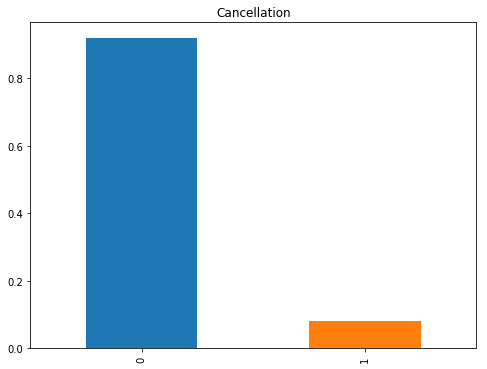

In [24]:
clean_df['Car_Cancellation'].value_counts(normalize=True).plot.bar(figsize=(8,6), title= 'Cancellation') 

Location Points Visualization

In [25]:
# m = folium.Map(location = [12.9716, 77.5946], tiles = "Open Street Map")

# for i in range(len(clean_df)):
#     assert clean_df['from_lat'][i] != 0
#     folium.Marker([clean_df['from_lat'][i], clean_df['from_long'][i]]).add_to(m)
# m

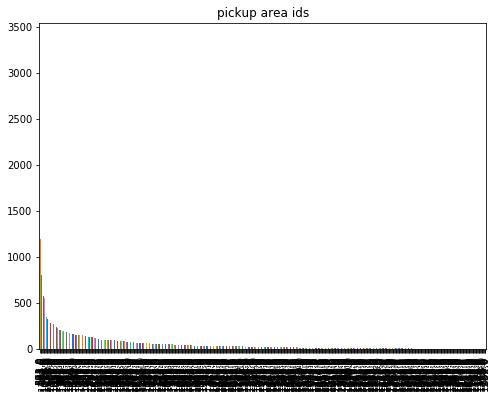

In [26]:
clean_df['from_area_id'].value_counts().plot.bar(figsize=(8,6), title= 'pickup area ids') 

In [27]:
df['from_area_id'].value_counts().head(10)

393.0     3858
571.0     1631
293.0     1052
585.0      911
1010.0     768
142.0      727
83.0       719
1384.0     628
1096.0     542
58.0       466
Name: from_area_id, dtype: int64

These are the top pickup locations based on frequency of pickups

In [28]:
df['to_area_id'].value_counts().head(10)

393.0     8777
585.0     2339
1384.0    1237
571.0      664
293.0      555
1010.0     480
83.0       365
168.0      338
1371.0     332
452.0      330
Name: to_area_id, dtype: int64

These are the top drop locations based on frequency of drops

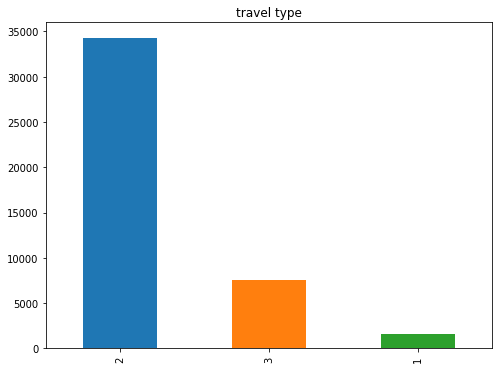

In [29]:
df['travel_type_id'].value_counts().plot.bar(figsize=(8,6), title= 'travel type') 

The most used travel type is point to point, so we say that point -to - point is the main thing that gets revenue to the company while hourly rental is rare but may get good revenue and less expense. 

##### I removed travel type3 bymistake bcoz they didn't have 'from_lat' and 'from_long' 
###### travel3 is hourly service so it did not have lat long values

In [30]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [31]:
df['from_date'].dtype

dtype('O')

In [32]:
df['from_date'] = pd.to_datetime(df['from_date'],format='%m/%d/%Y %H:%M')

In [33]:
df.index = df.index.sort_values()
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [34]:
df.index = df['from_date']
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
from_date,,,,,,,,,,,,,,,,,,,
2013-01-01 02:00:00,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
2013-01-01 09:00:00,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2013-01-01 03:30:00,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
2013-01-01 05:45:00,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
2013-01-01 09:00:00,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [36]:
df['from_year'] = df['from_date'].dt.year
df['from_month'] = df['from_date'].dt.month 
df['from_day'] = df['from_date'].dt.day
df['from_hour'] = df['from_date'].dt.hour

In [37]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_year,from_month,from_day,from_hour
from_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 02:00:00,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,...,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,2013,1,1,2
2013-01-01 09:00:00,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,...,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,2013,1,1,9
2013-01-01 03:30:00,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,...,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,2013,1,1,3
2013-01-01 05:45:00,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,...,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,2013,1,1,5
2013-01-01 09:00:00,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,...,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,2013,1,1,9


Time based analysis

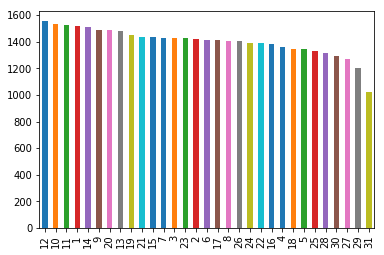

In [48]:
df['from_day'].sort_values().value_counts().plot.bar()

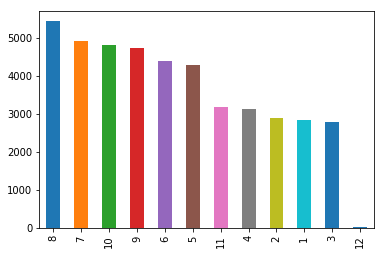

In [49]:
df['from_month'].sort_values().value_counts().plot.bar()

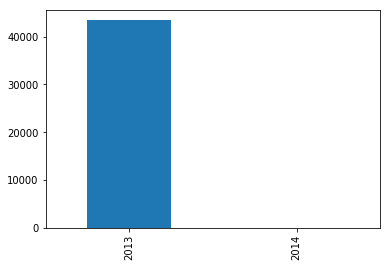

In [50]:
df['from_year'].sort_values().value_counts().plot.bar()

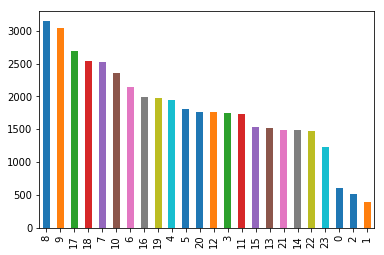

In [51]:
df['from_hour'].sort_values().value_counts().plot.bar()